In [1]:
# 1. 데이터 가져오기
import numpy as np
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame=True)
diabetes.frame

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [3]:
df_X = diabetes.data
df_y = diabetes.target

In [4]:
df_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [5]:
X = df_X.values
y = df_y.values

In [6]:
print(type(X), type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(442, 10) (442,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(331, 10) (331,)
(111, 10) (111,)


In [8]:
np.random.seed(42)
W = np.random.rand(10)
b = np.random.rand()

print(W.shape, b)

(10,) 0.020584494295802447


In [9]:
def predict(X, W, b):
    return np.dot(X, W) + b

In [10]:
def loss(X, W, b, y):
    predictions = predict(X, W, b)
    return ((predictions - y) ** 2).mean()

In [11]:
def gradient(X, W, b, y):
    N = len(y)
    predictions = predict(X, W, b)
    dW = 1 / N * 2 * X.T.dot(predictions - y)
    db = 2 * (predictions - y).mean()
    return dW, db
    

In [12]:
learning_rate = 0.01

In [13]:
losses = []
for i in range(1, 35001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    if i % 1000 == 0:
        l = loss(X_train, W, b, y_train)
        print(f"{i} epoch - train loss: {l:.02f}")
    

1000 epoch - train loss: 5372.25
2000 epoch - train loss: 4889.29
3000 epoch - train loss: 4528.23
4000 epoch - train loss: 4254.70
5000 epoch - train loss: 4044.45
6000 epoch - train loss: 3880.30
7000 epoch - train loss: 3750.06
8000 epoch - train loss: 3645.02
9000 epoch - train loss: 3558.96
10000 epoch - train loss: 3487.37
11000 epoch - train loss: 3426.99
12000 epoch - train loss: 3375.42
13000 epoch - train loss: 3330.91
14000 epoch - train loss: 3292.12
15000 epoch - train loss: 3258.05
16000 epoch - train loss: 3227.92
17000 epoch - train loss: 3201.14
18000 epoch - train loss: 3177.21
19000 epoch - train loss: 3155.76
20000 epoch - train loss: 3136.47
21000 epoch - train loss: 3119.07
22000 epoch - train loss: 3103.35
23000 epoch - train loss: 3089.12
24000 epoch - train loss: 3076.22
25000 epoch - train loss: 3064.51
26000 epoch - train loss: 3053.86
27000 epoch - train loss: 3044.18
28000 epoch - train loss: 3035.35
29000 epoch - train loss: 3027.31
30000 epoch - train los

In [14]:
test_loss = loss(X_test, W, b, y_test)
print(f"test loss: {test_loss}")

test loss: 2810.269563510548


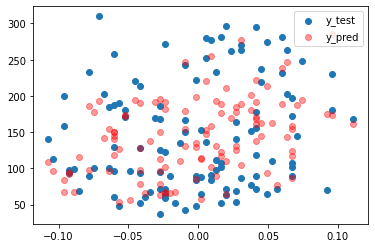

In [15]:
import matplotlib.pyplot as plt

y_predict = predict(X_test, W, b)
plt.scatter(X_test[:, 0], y_test, label="y_test")
plt.scatter(X_test[:, 0], y_predict, color="red", alpha=0.4, label="y_pred")
plt.legend()